En este ejemplo se generan muestras, a partir de una distribución Normal

$(X_{1},X_{2}) \sim \mathcal{N}(\mu, \Sigma)$

En este caso tenemos como función media:

$\mu = \begin{bmatrix} 8 & 6 \end{bmatrix}$

Y la función de covarianza que utilizamos es la siguiente:

$\Sigma = \begin{bmatrix} 6 & 2 \\ 2 & 3 \end{bmatrix}$

Luego se normalizan las muestras utilizando el teórema de limite Central

$Z_{i} = \frac{X_{i} - \mu_{X_i}}{\sqrt{\sigma_{X_i}}}    i = 1, 2$

De esta manera $Z_{1}$ y $Z_{2}$ $\sim \mathcal{N}(0, 1)$. Donde $E[X_i] = \mu_{X_i}$ y $Var(X_i) = \sigma_{X_i}$

Luego se calcula los vectores y valores propios de $\Sigma$ con los cuales graficamos la elipse en dirección de los vectores propios:

$\frac{e_1e_1^\top}{\lambda_1} + \frac{e_2e_2^\top}{\lambda_2} = 3$

Sobre la nueva base de los vectores propios rotamos los datos normalizados y sin normalizar para observar su comportamiento. Finalmente encontramos la matriz $\Sigma$ utilizando descomposición en valor singular.

$\Sigma = \sum_{i=1}^{p} \lambda_{i}e_ie_i^\top$

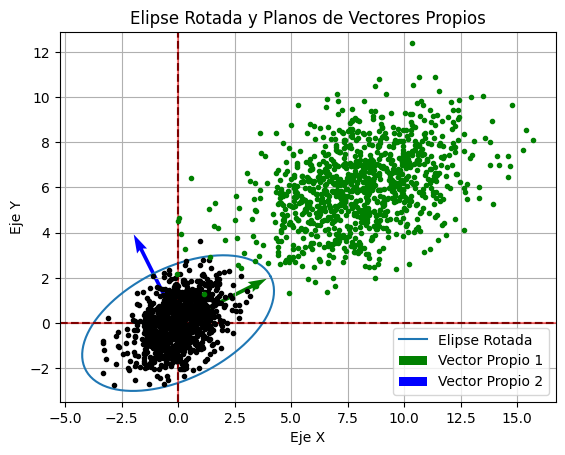

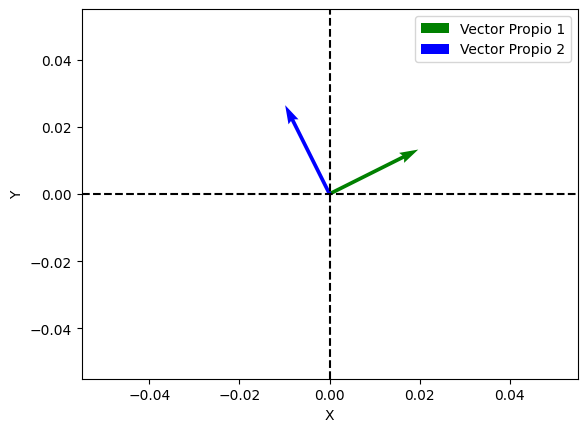

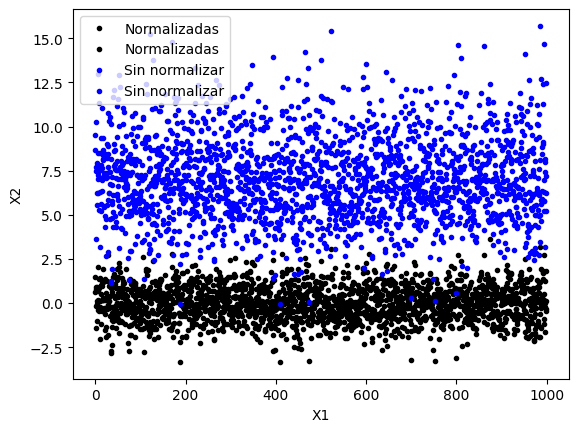

[[6. 2.]
 [2. 3.]]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generar muestras con distribución gaussiana multivariada


# Definir la matriz Sigma y U
Sigma = np.array([[6, 2], [2, 3]])
u = np.array([8, 6])
num_samples = 1000
p = Sigma.shape[0]
samples = np.random.multivariate_normal(u, Sigma, num_samples)

# Calcular la media y la desviación estándar en cada dimensión
mean = np.mean(samples, axis=0)
std_dev = np.std(samples, axis=0)
# Normalizar los datos
normalized_samples = (samples - mean) / std_dev

# Calcular los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
# Definir la elipse en el espacio original (no rotada)
theta = np.linspace(0, 2*np.pi, 100)
y1 = np.sqrt(eigenvalues[0]*3) * np.cos(theta)
y2 = np.sqrt(eigenvalues[1]*3) * np.sin(theta)

# Rotar la elipse utilizando los vectores propios
rotated_y1 = eigenvectors[0, 0] * y1 + eigenvectors[0, 1] * y2
rotated_y2 = eigenvectors[1, 0] * y1 + eigenvectors[1, 1] * y2

# Graficar la elipse rotada
plt.plot(rotated_y1, rotated_y2, label='Elipse Rotada')

# Graficar el plano definido por los vectores propios
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], scale=5, color='g', label='Vector Propio 1')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], scale=5, color='b', label='Vector Propio 2')

# Graficar el plano xy normal
plt.axhline(0, color='r', linestyle='-', alpha=0.5)
plt.axvline(0, color='r', linestyle='-', alpha=0.5)

# Configurar los límites del gráfico
max_abs_val = max(np.abs(np.concatenate((rotated_y1, rotated_y2))))
plt.xlim(-max_abs_val, max_abs_val)
plt.ylim(-max_abs_val, max_abs_val)

# Gráfico completo
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Elipse Rotada y Planos de Vectores Propios')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.plot(normalized_samples[:,0], normalized_samples[:,1], '.k')
plt.plot(samples[:,0], samples[:,1], '.g')
plt.show()

# Graficar el plano xy normal y el definido por los vectores propios
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], scale=5, color='g', label='Vector Propio 1')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], scale=5, color='b', label='Vector Propio 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Gráfico de muestras normalizadas y sin normalizar
plt.plot(normalized_samples, '.k', label='Normalizadas')
plt.plot(samples, '.b', label= 'Sin normalizar')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
# Se encuentra la matriz en descomposición de valores singulares
SigmaUSV = eigenvalues[0]*np.dot(np.reshape(eigenvectors[:,0], (p,1)), np.reshape(eigenvectors[:,0],(1,p))) + eigenvalues[1]*np.dot(np.reshape(eigenvectors[:,1], (p,1)), np.reshape(eigenvectors[:,1],(1,p)))
print(SigmaUSV)

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


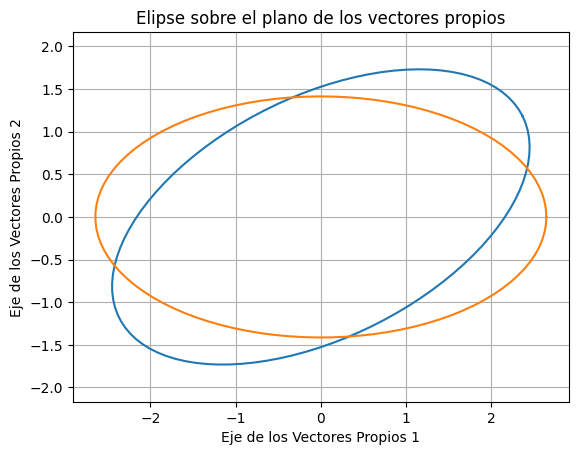

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz A
A = np.array([[6, 2], [2, 3]])

# Calcular los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvectors)

# Definir la elipse en el espacio original (no rotada)
theta = np.linspace(0, 2*np.pi, 100)
y1 = np.sqrt(eigenvalues[0]) * np.cos(theta)
y2 = np.sqrt(eigenvalues[1]) * np.sin(theta)

# Rotar la elipse utilizando los vectores propios
rotated_y1 = eigenvectors[0, 0] * y1 + eigenvectors[0, 1] * y2
rotated_y2 = eigenvectors[1, 0] * y1 + eigenvectors[1, 1] * y2

# Graficar la elipse en el plano de los vectores propios
plt.figure()
plt.plot(rotated_y1, rotated_y2)
plt.plot(y1, y2)
plt.axis('equal')
plt.grid(True)
plt.xlabel('Eje de los Vectores Propios 1')
plt.ylabel('Eje de los Vectores Propios 2')
plt.title('Elipse sobre el plano de los vectores propios')
plt.show()